# Tutorial: Artificial Neural Networks



## Neural network basics



![img](nn1.png)

Mathematically, A neural network is a graph, a series of nodes
connected by edges.

This graph acts as a universal function approximator: an input feature
vector is mapped to an output value, which is interpreted as a
probability.

The basic network unit resembles a neuron in the brain: the node is
like a single axon that accepts inputs from many dendrites.

![img](nn3.png)

That looks losely like a single node being fed input by its edges:

![img](nn2.png)

Artificial neural networks (ANNs) work quite differently:

-   The circle is the *node* implementing an *activation function* that
    calculates the *output* of the node, a single number.
-   Each *input* (square) is a number $x_0$ and $x_1$.
-   Each input moves along its edge to the node where $w_0$ and $w_1$
    represent the *weights* or connection strength.
-   The value of the activation function $\alpha$ is the output of the
    node. Here, $b_0$ is the *bias* term or offset for this first node.

Alternative names for ANNs are *multi-layer perceptrons* (MLPs), as in
Python's `sklearn` library class name, `MLPClassifier`.



## Activation function



The key to the network response is the activation function $\alpha$:

-   If the activation function is linear, it can only learn linear
    mappings (straight line patterns).

-   Traditional ANNs use sigmoid activation functions, like $\sigma(x) =
      \frac{1}{1+e^{-x}}$ or $tanh(x)$ (hyperbolic tangent).
    
    ![img](sigmoid.png)

-   More recently, a *rectified linear unit* (ReLU) is used: the piecewise
    nature of the curve makes it nonlinear, and it is easy to compute.
    
    ![img](relu.png)



## The dataset



We use the [wine quality data set](https://archive.ics.uci.edu/dataset/186/wine+quality) from the UCI Machine Learning
repository. There are three datasets: a `names` file with information
about the features, data origin and structure, and two CSV files with
red and white wine data.

Input variables (based on physicochemical tests):

1.  fixed acidity (`facid`)
2.  volatile acidity (`vacid`)
3.  citric acid (`cacid`)
4.  residual sugar (`sugar`)
5.  chlorides (`chlor`)
6.  free sulfur dioxide (`fsdio`)
7.  total sulfur dioxide (`tsdio`)
8.  density (`density`)
9.  pH (`ph`)
10. sulphates (`sulph`)
11. alcohol (`alc`)

Output variable (based on sensory data):

1.  quality (score between 0 and 10) (`quality`)



## Loading the data



Load `pandas` as `pd`:



In [1]:
import pandas as pd

Rename header:



In [3]:
col_names = ['facid', 'vacid', 'cacid', 'sugar', 'chlor', 'fsdio', 'tsdio', 'density', 'ph', 'sulph', 'alc', 'quality']

Import white wine quality dataset as data frame:



In [8]:
white = pd.read_csv("winequality-white.csv",
                   header=0,
                   sep=";",
                   names=col_names)

print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   facid    4898 non-null   float64
 1   vacid    4898 non-null   float64
 2   cacid    4898 non-null   float64
 3   sugar    4898 non-null   float64
 4   chlor    4898 non-null   float64
 5   fsdio    4898 non-null   float64
 6   tsdio    4898 non-null   float64
 7   density  4898 non-null   float64
 8   ph       4898 non-null   float64
 9   sulph    4898 non-null   float64
 10  alc      4898 non-null   float64
 11  quality  4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


Same with the red wine quality dataset:



In [7]:
red = pd.read_csv("winequality-red.csv",
                   header=0,
                   sep=";",
                   names=col_names)

print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   facid    1599 non-null   float64
 1   vacid    1599 non-null   float64
 2   cacid    1599 non-null   float64
 3   sugar    1599 non-null   float64
 4   chlor    1599 non-null   float64
 5   fsdio    1599 non-null   float64
 6   tsdio    1599 non-null   float64
 7   density  1599 non-null   float64
 8   ph       1599 non-null   float64
 9   sulph    1599 non-null   float64
 10  alc      1599 non-null   float64
 11  quality  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


## Looking at the data



### Looking at head, tail and sample data



In [10]:
print(red.sample())

     facid  vacid  cacid  sugar  chlor  ...  density    ph  sulph   alc  quality
885    8.9   0.75   0.14    2.5  0.086  ...  0.99824  3.34   0.64  10.5        5

[1 rows x 12 columns]


### Looking at statistical summary data



In [11]:
print(white.describe())

             facid        vacid  ...          alc      quality
count  4898.000000  4898.000000  ...  4898.000000  4898.000000
mean      6.854788     0.278241  ...    10.514267     5.877909
std       0.843868     0.100795  ...     1.230621     0.885639
min       3.800000     0.080000  ...     8.000000     3.000000
25%       6.300000     0.210000  ...     9.500000     5.000000
50%       6.800000     0.260000  ...    10.400000     6.000000
75%       7.300000     0.320000  ...    11.400000     6.000000
max      14.200000     1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]


### Visualizing distributions of variables



#### Preparation



As an example of visualization, let's look at the distribution of some
of these variables in connection with our target variable (`quality`).

We use `matplotlib` to visualize the alcohol values as a `histogram`:



In [12]:
# import plotting module
import matplotlib.pyplot as plt

Note: If you loaded `plt` objects, you may have to reload the libraries:



In [8]:
from importlib import reload
plt=reload(plt)

#### How much alcohol?



Now we generate a plot for red and for white wine each.



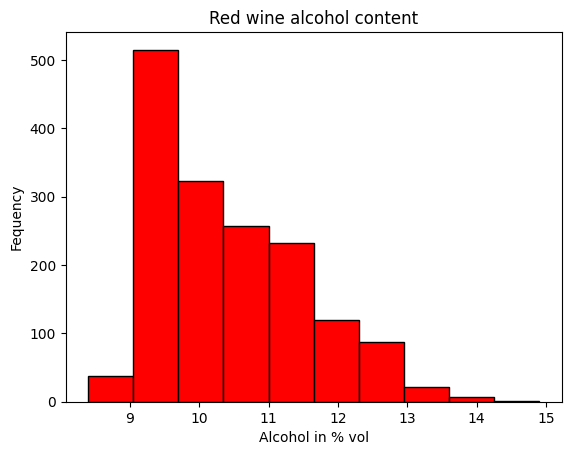

In [18]:
plt.clf()
plt.hist(red.alc, ec='black',color='red')
plt.title('Red wine alcohol content')
plt.xlabel("Alcohol in % vol")
plt.ylabel('Fequency')
plt.show()

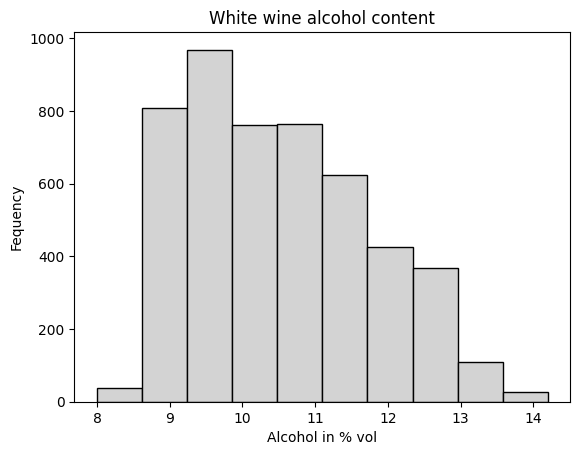

In [19]:
plt.clf()
plt.hist(white.alc, ec='black',color='lightgrey')
plt.title('White wine alcohol content')
plt.xlabel("Alcohol in % vol")
plt.ylabel('Fequency')
plt.show()

Both plots next to one another (just run the code):



<Figure size 640x480 with 0 Axes>

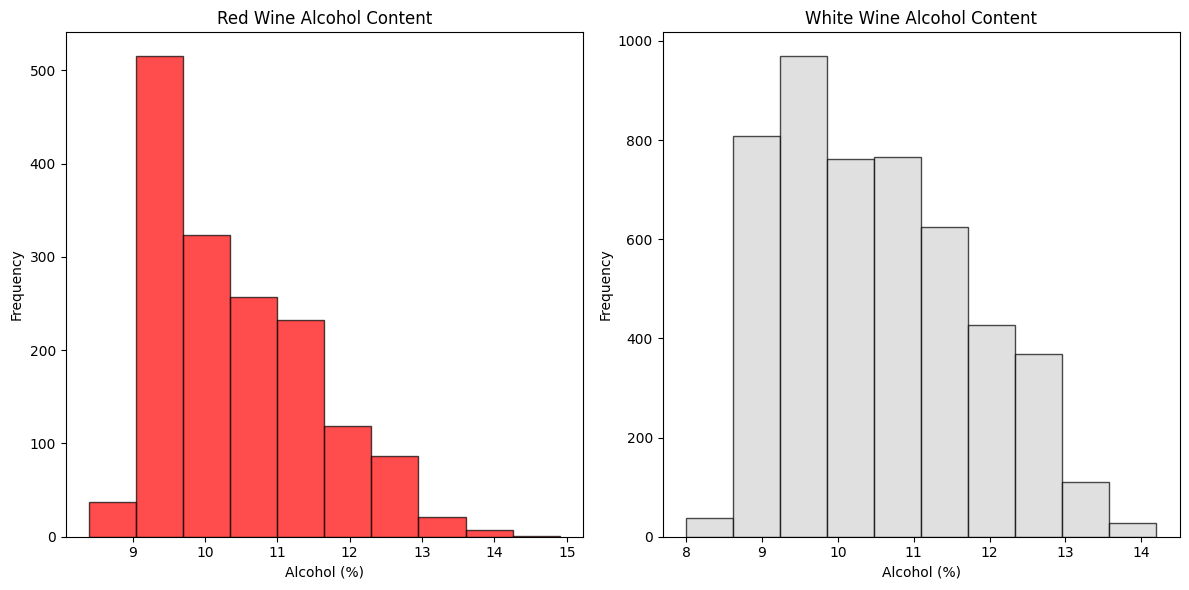

In [20]:
# clean graphics stream
plt.clf()

# Plot histograms
plt.figure(figsize=(12, 6))

# Red wine histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(red.alc, color='red', edgecolor='black', alpha=0.7)
plt.title("Red Wine Alcohol Content")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")

# White wine histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(white.alc, color='lightgray', edgecolor='black', alpha=0.7)
plt.title("White Wine Alcohol Content")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")

# Show plot
plt.tight_layout()
plt.show()

Here, the two plots are hard to compare because they have different x
and y scales. To fix this, x- and y-axes need to be shared:



<Figure size 640x480 with 0 Axes>

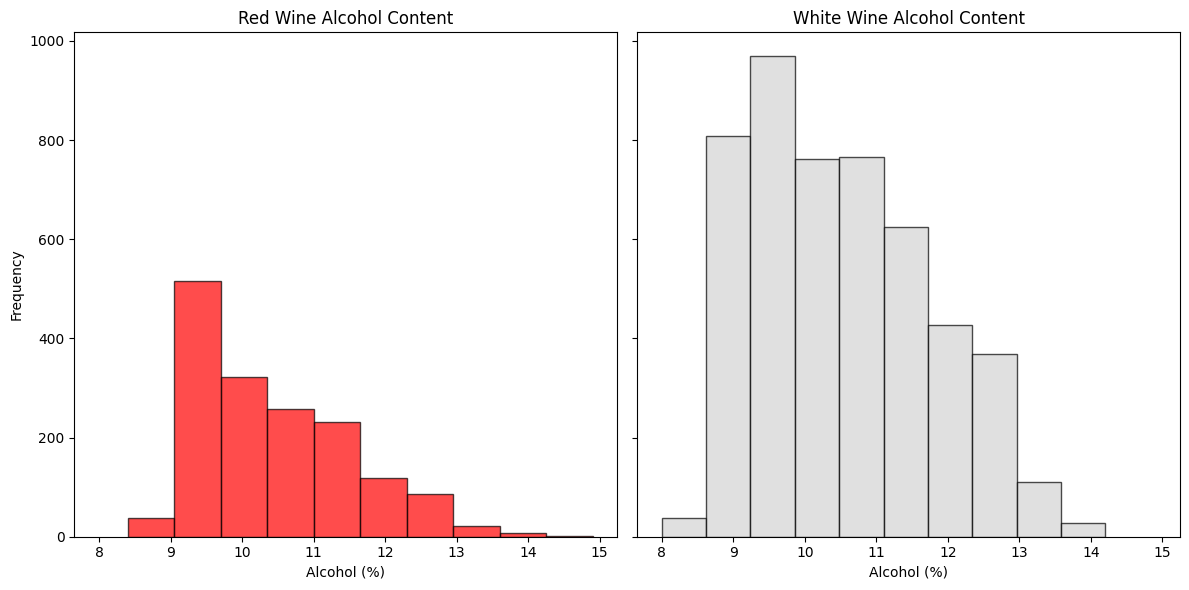

In [21]:
plt.clf() # clear graphics file

# Create a figure and a 1x2 grid of subplots with shared x and y axes
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(12, 6),
                         sharex=True,
                         sharey=True)

# Red wine histogram
axes[0].hist(red.alc, color='red',
             edgecolor='black', alpha=0.7)
axes[0].set_title("Red Wine Alcohol Content")
axes[0].set_xlabel("Alcohol (%)")
axes[0].set_ylabel("Frequency")

# White wine histogram
axes[1].hist(white.alc, color='lightgray',
             edgecolor='black', alpha=0.7)
axes[1].set_title("White Wine Alcohol Content")
axes[1].set_xlabel("Alcohol (%)")
# No need to set y-label again as it's shared with the first subplot

plt.tight_layout()
plt.show()

#### What impact do sulfates have on quality?



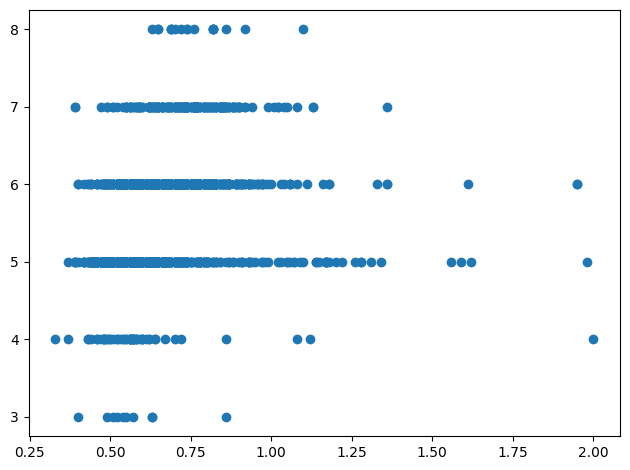

In [22]:
plt.clf()
plt.scatter(y=red.quality,x=red.sulph)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

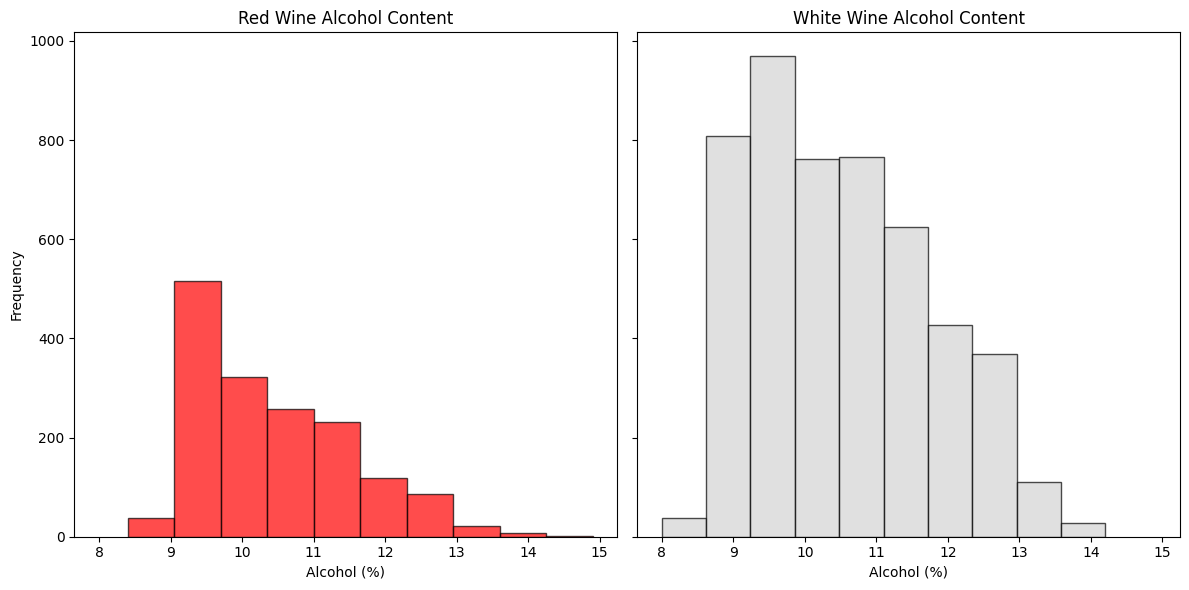

In [23]:
plt.clf() # clear graphics file

# Create a figure and a 1x2 grid of subplots with shared x and y axes
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(12, 6),
                         sharex=True,
                         sharey=True)

# Red wine histogram
axes[0].hist(red.alc, color='red',
             edgecolor='black', alpha=0.7)
axes[0].set_title("Red Wine Alcohol Content")
axes[0].set_xlabel("Alcohol (%)")
axes[0].set_ylabel("Frequency")

# White wine histogram
axes[1].hist(white.alc, color='lightgray',
             edgecolor='black', alpha=0.7)
axes[1].set_title("White Wine Alcohol Content")
axes[1].set_xlabel("Alcohol (%)")
# No need to set y-label again as it's shared with the first subplot

plt.tight_layout()
plt.show()

#### What impact does acidity have on quality?



Let’s put the data to the test and make a scatter plot that plots the
alcohol versus the volatile acidity. The data points should be colored
according to their rating or quality label.

First for the red wine:



<Figure size 640x480 with 0 Axes>

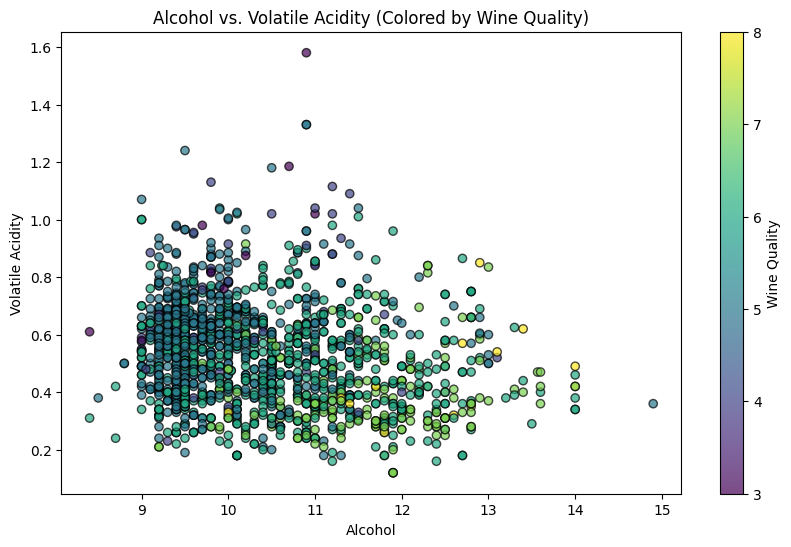

In [31]:
plt.clf()
# Extract relevant columns
x = red.alc
y = red.vacid
colors = red.quality  # This will be used to color the data points

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis',
                      edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Alcohol vs. Volatile Acidity (Colored by Wine Quality)')
plt.show()

Then for the white whine:



<Figure size 640x480 with 0 Axes>

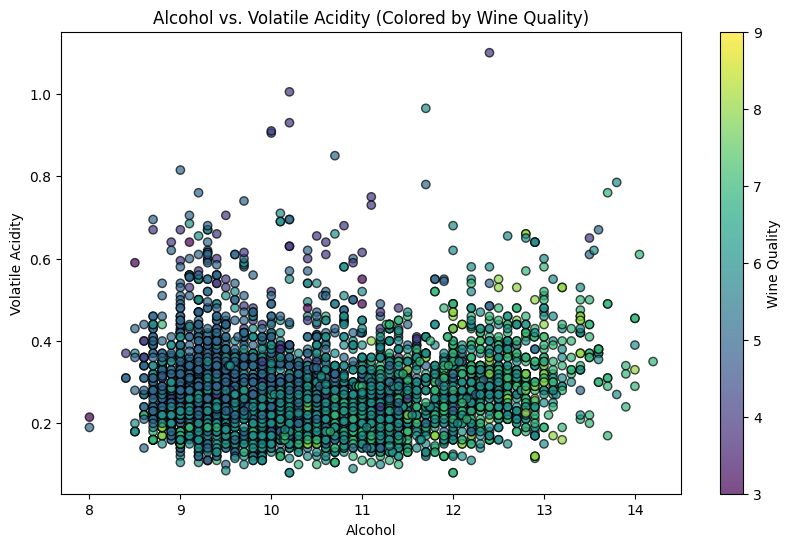

In [30]:
plt.clf()
# Extract relevant columns
x = white.alc
y = white.vacid
colors = white.quality  # This will be used to color the data points

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis',
                      edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Alcohol vs. Volatile Acidity (Colored by Wine Quality)')
plt.show()

### EDA summary



-   Some of the variables of your data sets have values that are
    considerably far apart.
-   You have an ideal scenario: there are no null values in the data
    sets.
-   Most wines that were included in the data set have around 9% of
    alcohol.
-   Red wine seems to contain more sulphates than the white wine, which
    has less sulphates above 1 g/l
-   Most wines had a volatile acidity of 0.5 and below. At the moment,
    there is no direct relation to the quality of the wine.



## Preprocessing



To join both data sets for the building of an ANN, add another feature
`type` which is `0` for white, and `1` for red wine.



In [24]:
white['type']=0
print(white.columns)
red['type']=1
print(red.columns)

Index(['facid', 'vacid', 'cacid', 'sugar', 'chlor', 'fsdio', 'tsdio',
       'density', 'ph', 'sulph', 'alc', 'quality', 'type'],
      dtype='object')
Index(['facid', 'vacid', 'cacid', 'sugar', 'chlor', 'fsdio', 'tsdio',
       'density', 'ph', 'sulph', 'alc', 'quality', 'type'],
      dtype='object')


Join the datasets and ignore the indices of the original datasets:



In [25]:
wine = pd.concat([white,red],
                axis=0,
                ignore_index=True)

print(wine.describe())

             facid        vacid  ...      quality         type
count  6497.000000  6497.000000  ...  6497.000000  6497.000000
mean      7.215307     0.339666  ...     5.818378     0.246114
std       1.296434     0.164636  ...     0.873255     0.430779
min       3.800000     0.080000  ...     3.000000     0.000000
25%       6.400000     0.230000  ...     5.000000     0.000000
50%       7.000000     0.290000  ...     6.000000     0.000000
75%       7.700000     0.400000  ...     6.000000     0.000000
max      15.900000     1.580000  ...     9.000000     1.000000

[8 rows x 13 columns]


## Check correlation of variables across dataset



We use `seaborn` to plot a correlation matrix:



<AxesSubplot: >

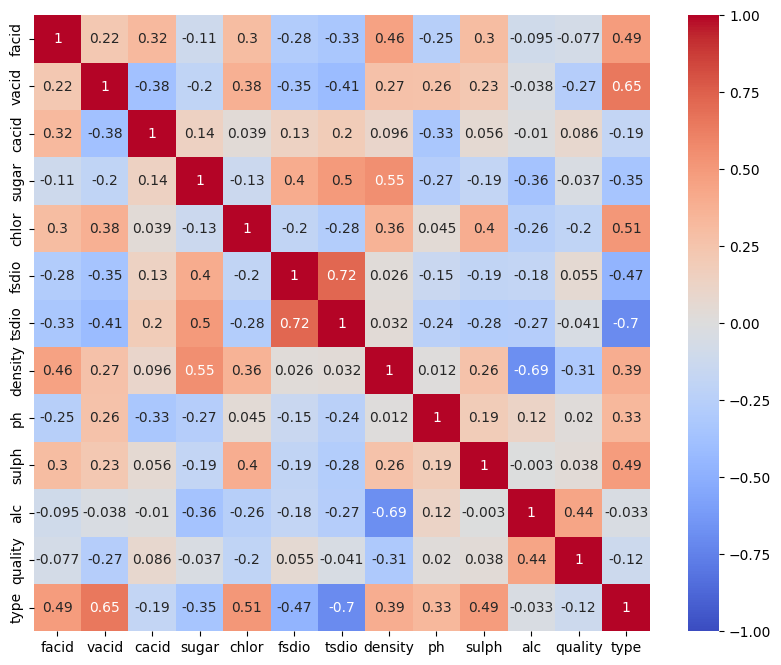

In [29]:
# import plotting library
import seaborn as sns
# Compute the correlation matrix
corr_matrix = wine.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='coolwarm',
           vmin=-1,vmax=1,
           square=True)

## Building an ANN for classification



First, we create a feedforward, fully connected ANN with one input
layer, one hidden layer, and one output layer. Our workflow:

1.  Preprocessing: normalizing, splitting into training and testing data.
2.  Build the neural net.
3.  Train the model.
4.  Test the model.
5.  Evaluate the model.



### Load libraries



Load libraries: we use `sklearn` for preprocessing, and the `keras` module
of the `tensorflow` library to build our network.



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Build training and test data sets



Preprocessing:



In [33]:
# our target feature is `type` to classify wine as `red` or `white`
X = wine.drop('type', axis=1)
y= wine['type']
print(X.head(3))
print(y.head(3))

   facid  vacid  cacid  sugar  chlor  ...  density    ph  sulph   alc  quality
0    7.0   0.27   0.36   20.7  0.045  ...   1.0010  3.00   0.45   8.8        6
1    6.3   0.30   0.34    1.6  0.049  ...   0.9940  3.30   0.49   9.5        6
2    8.1   0.28   0.40    6.9  0.050  ...   0.9951  3.26   0.44  10.1        6

[3 rows x 12 columns]
0    0
1    0
2    0
Name: type, dtype: int64


Split data into train and test (80:20)



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

Normalize the features:



In [35]:
# fit training and testing data to normalized dataset
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# convert back to DataFrame for better visualization
X_train_normalized_df = pd.DataFrame(X_train_normalized,
                                     columns=X_train.columns)

print(X_train_normalized_df.head())

      facid     vacid     cacid  ...     sulph       alc   quality
0 -0.478105 -0.543034  0.279855  ... -0.751221 -1.085069 -0.929309
1  0.975055 -1.086160  0.210936  ... -1.148463 -0.414058 -0.929309
2 -0.936998 -0.361991  0.142016  ... -1.016049 -0.246305  0.207072
3 -0.172177 -0.180949 -0.064742  ... -1.479499  1.263470  1.343452
4  0.975055  0.603567  1.244728  ...  3.750858 -0.917316 -0.929309

[5 rows x 12 columns]


Once the `StandardScaler` is fitted to the training data (`X_train`), you
should use that fitted scaler to transform the test data
(`X_test`). It's essential not to fit the scaler to the test data, as
this would be introducing information from the test set into the
preprocessing step, which is a form of data leakage.



In [36]:
# transform 
X_test_normalized = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

print(X_test_normalized_df.head())

      facid     vacid     cacid  ...     sulph       alc   quality
0 -0.172177 -0.543034  0.900130  ... -0.353979  1.179593  1.343452
1  0.286716 -1.206855  2.898795  ... -0.883635  0.256953  1.343452
2 -0.784033 -1.146507 -0.340420  ... -1.016049 -1.168946  0.207072
3 -0.401623 -1.086160  0.004177  ... -1.148463 -1.252822  0.207072
4 -0.325141 -0.422339 -0.685017  ... -0.022944 -1.085069 -0.929309

[5 rows x 12 columns]


### Build the neural network



We use a ReLU activation function for the input and for the hidden
layer, and a sigmoid output activation function (to classify 0 or 1):



In [37]:
# transform 
X_test_normalized = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

print(X_test_normalized_df.head())

      facid     vacid     cacid  ...     sulph       alc   quality
0 -0.172177 -0.543034  0.900130  ... -0.353979  1.179593  1.343452
1  0.286716 -1.206855  2.898795  ... -0.883635  0.256953  1.343452
2 -0.784033 -1.146507 -0.340420  ... -1.016049 -1.168946  0.207072
3 -0.401623 -1.086160  0.004177  ... -1.148463 -1.252822  0.207072
4 -0.325141 -0.422339 -0.685017  ... -0.022944 -1.085069 -0.929309

[5 rows x 12 columns]


### Train the model on the data



The `model.compile` method configures the model for training:

-   The `optimizer` algorithm is used to minimize the `loss` function.
-   The `loss` function is different for binary (2 target choices),
    regression or multiclassification problems.
-   The `metrics` parameter is a list of metrics to be evaluated by the
    model.



In [38]:
model = keras.Sequential([
    layers.Dense(128, activation='relu',
                 input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer
])

print(type(model))
print(model.summary())

<class 'keras.engine.sequential.Sequential'>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________
None


2023-10-23 14:51:41.979534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


When you call the `model.fit()` function in Keras, here's what happens
behind the scenes for each batch of data:

-   Forward Pass: The model processes the batch of input data and makes
    predictions. These predictions are then compared to the true labels
    to compute the loss (using the loss function you specified in
    `model.compile()`).
-   Backward Propagation: Gradients of the loss with respect to the
    model parameters (weights and biases) are computed. This is done
    using automatic differentiation.

-Weight Update: The optimizer updates the model's weights based on the
computed gradients.

The training returns a `history` object that contains a recored of
training loss values and metrics values for successive epochs
(training run followed by a test), as well as validation loss and
metrics values.

The model fit can be used to plot the training and validation loss and
accuracy over epochs to diagnose overfitting (training loss continues
to decrease, but validation loss starts to increase):



The dataset is divided into batches. Each batch is processed at one
time and the average loss over the samples is computed. The weights of
the ANN are updated accordingly. This is repeated for each batch.

One epoch is completed when the entire dataset has been passed forward
and backward through the neural net once. Depending on the batch size,
an epoch can involve many batch iterations.



## Use model to predict target values



## Validate the model



The score is a list that holds the combination of loss and accuracy:



The confusion matrix breaks predictions down into a table. Ideally you
only see numbers in the diagonal:

-   Precision measures the classifier's exactness (the higher the more accurate).
-   Recall is the completeness: the higher the recall the more cases covered.
-   F1/F-score is a weighted average of precision and recall.
-   Kappa is the classifier's accuracy normalized by the imbalance of
    classes in the data.



In [7]:
# import confusion_matrix from sklearn.metrics

# 1. Predict the classes

# 2. Compute the confusion matrix

# 3. Visualize the confusion matrix


## Sources and further reading



Sources:

-   Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and
    Reis,J.. (2009). Wine Quality. UCI Machine Learning
    Repository. [https://doi.org/10.24432/C56S3T](https://doi.org/10.24432/C56S3T).
-   Kneusel R T. Practical Deep Learning. NoStarch, 2021.
-   Willems K. Keras Tutorial: Deep Learning in
    Python. DataCamp. Published December 2019. Available from:
    [https://www.datacamp.com/tutorial/deep-learning-python>](https://www.datacamp.com/tutorial/deep-learning-python>)(accessed
    October 22, 2023)​1​.

See also: [Deep Learning in Python DataCamp course](https://app.datacamp.com/learn/courses/deep-learning-in-python). Prerequisites for
the course:

-   [Supervised learning with scikit-learn](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)
-   [Intro to statistics in Python](https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python)
-   [Data manipulation with pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)

